In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
x = load_breast_cancer().data

In [3]:
print(x.shape)

(569, 30)


In [4]:
feature_names  =load_breast_cancer().feature_names
print('Feature Names : ',feature_names)
print('Labels : ',load_breast_cancer().target_names)

Feature Names :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels :  ['malignant' 'benign']


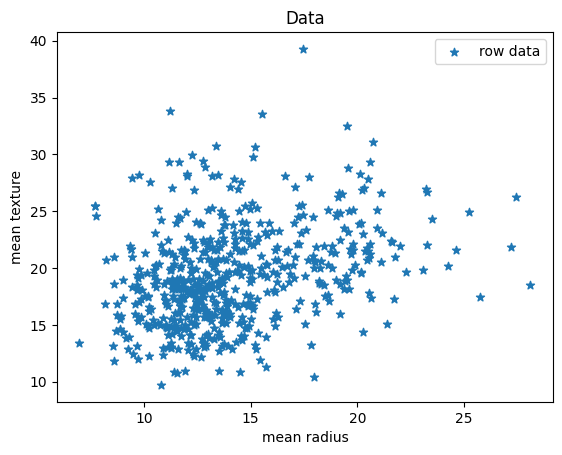

In [5]:
#scatter row data
plt.scatter(x[:,0],x[:,1],label='row data',marker='*')
plt.title('Data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

In [6]:
Sum_Square_Error = [] # for store cost or error value in list for choosing best value of K 

In [7]:
for k in range(1,8): 
    model = KMeans(n_clusters=k,n_init= 'auto',init='k-means++')
    model.fit(x)
    Sum_Square_Error.append(model.inertia_)

In [8]:
print(Sum_Square_Error)

[256677243.95420247, 77943099.87829882, 50517769.559281915, 29226541.651979793, 20539877.62210287, 17054794.29738924, 14611173.341012772]


Text(0, 0.5, 'Sum Square Error')

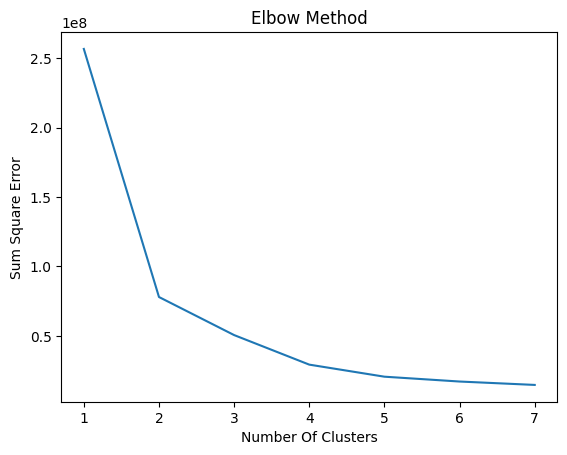

In [9]:
plt.plot(range(1,(len(Sum_Square_Error)+1)) ,Sum_Square_Error )
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum Square Error')

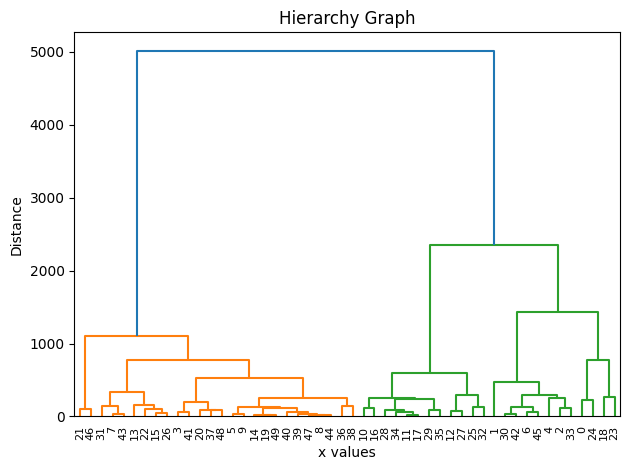

In [10]:
hc = sch.dendrogram(sch.linkage(x[:50,:],method='ward'))
plt.title('Hierarchy Graph')
plt.xlabel('x values')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [11]:
def scatter_data(num_of_plots,ypred,centers):
    for i in range(num_of_plots):
        plt.scatter(x[ypred==0,i],x[ypred==0,i+1], color='yellow',alpha=0.8,label='Cluster 0',marker='*')
        plt.scatter(centers[0,i],centers[0,i+1],color='red',s=250,marker='*',label='Centroid 0')

        plt.scatter(x[ypred==1,i],x[ypred==1,i+1], color='cyan',alpha=0.9,label='Cluster 1',marker='*')
        plt.scatter(centers[1,i],centers[1,i+1],color='blue',s=250,marker='*',label='Centroid 1')
        
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[i+1])
        plt.title(f"{feature_names[i]}"+" VS " + f"{feature_names[i+1]}")
        plt.legend()
        plt.show()

K Means Model

Centers :  [[1.24468918e+01 1.85046588e+01 8.03803294e+01 4.86458118e+02
  9.48157176e-02 9.04881882e-02 6.08800016e-02 3.25494682e-02
  1.77951765e-01 6.35771765e-02 3.00681647e-01 1.21837294e+00
  2.12940400e+00 2.32080188e+01 7.17541647e-03 2.33490235e-02
  2.84143873e-02 1.05452329e-02 2.07137600e-02 3.75171835e-03
  1.38918094e+01 2.45948235e+01 9.09125412e+01 6.04658353e+02
  1.29845529e-01 2.21074000e-01 2.14822228e-01 8.97035082e-02
  2.82468471e-01 8.32831059e-02]
 [1.84309600e+01 2.14308000e+01 1.21615520e+02 1.06422560e+03
  1.00427120e-01 1.41168160e-01 1.60892080e-01 9.15133600e-02
  1.91358400e-01 6.07022400e-02 6.40993600e-01 1.20602880e+00
  4.50466400e+00 7.56068000e+01 6.57389600e-03 3.10533280e-02
  4.12840000e-02 1.54203840e-02 2.00368000e-02 3.94023200e-03
  2.22756000e+01 2.86554400e+01 1.48283200e+02 1.53216800e+03
  1.39557440e-01 3.46571680e-01 4.31695200e-01 1.82111600e-01
  3.15973600e-01 8.65140000e-02]
 [2.34015789e+01 2.27621053e+01 1.56147368e+02 1.729421

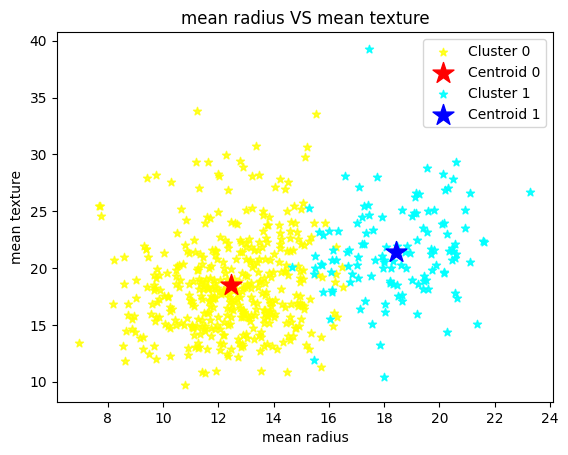

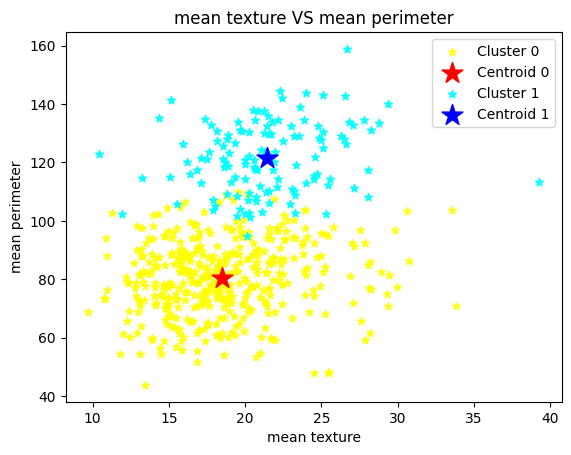

In [12]:
Model = KMeans(n_clusters=3,n_init='auto',init='k-means++')
Model.fit(x)
ypred = Model.predict(x)

centers = Model.cluster_centers_
error = Model.inertia_
lables = set(Model.labels_)

print('Centers : ',centers)
print('Cost : ',error)
print('Labels : ',lables)
scatter_data(2,ypred,centers)

KNN Model

In [13]:
knn_model = NearestNeighbors(n_neighbors=10,radius=3)
knn_model.fit(x)
print(knn_model.kneighbors(x[:3,:])) 

(array([[  0.        , 186.61763   , 194.56881285, 204.17130519,
        209.53712484, 220.48124164, 225.49450856, 232.15351394,
        232.27181442, 232.69821481],
       [  0.        ,  16.06923809,  66.63172654,  86.23022834,
         89.33922096,  92.56071112, 121.45948418, 121.69040643,
        123.67921362, 129.61543757],
       [  0.        ,  51.71676151,  54.63359021,  59.60206533,
         63.9928558 ,  72.44811608,  72.77063232,  73.04039738,
         74.16095887,  90.16274663]]), array([[  0, 337, 254,  56,  70, 300,  24, 218, 252, 256],
       [  1, 373, 323, 233, 449, 250, 218, 260, 252, 256],
       [  2, 366, 487, 302, 565, 280, 198, 517,  95, 321]], dtype=int64))


Hierarchy Cluster Model

Labels :  {0, 1}


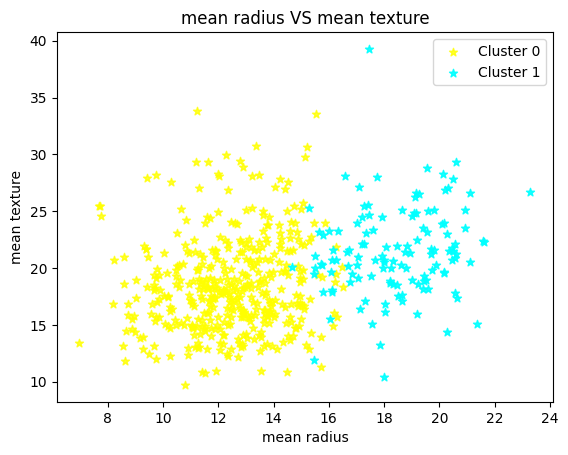

In [14]:
H_model = AgglomerativeClustering(n_clusters=2,linkage='ward')
H_model.fit(x)
H_ypred = H_model.fit_predict(x)
lables = set(H_model.labels_)
print('Labels : ',lables)

plt.scatter(x[ypred==0,0],x[ypred==0,1], color='yellow',alpha=0.8,label='Cluster 0',marker='*')
plt.scatter(x[ypred==1,0],x[ypred==1,1], color='cyan',alpha=0.9,label='Cluster 1',marker='*')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f"{feature_names[0]}"+" VS " + f"{feature_names[1]}")
plt.legend()
plt.show()

DBSCAN Model

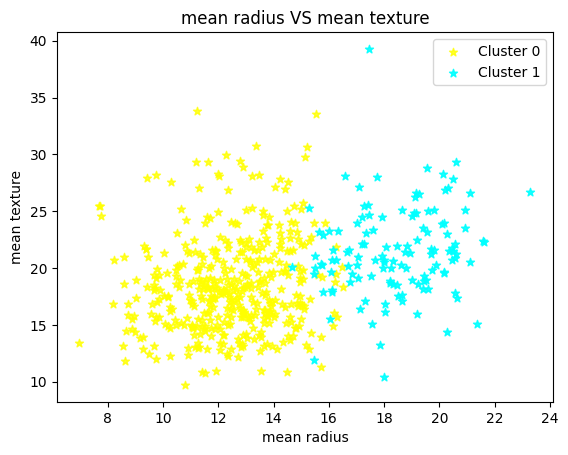

In [15]:
DB_model = DBSCAN(eps=1,algorithm='auto')
DB_model.fit(x)
lables = set(DB_model.labels_)
plt.scatter(x[ypred==0,0],x[ypred==0,1], color='yellow',alpha=0.8,label='Cluster 0',marker='*')
plt.scatter(x[ypred==1,0],x[ypred==1,1], color='cyan',alpha=0.9,label='Cluster 1',marker='*')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f"{feature_names[0]}"+" VS " + f"{feature_names[1]}")
plt.legend()
plt.show()
